# Non-uniform discrete Fourier transform

Hypothsis: While the harmonics form a basis for the continuous space, their sampled version do not form a basis for $\mathbb{R}^n$.
How far from a basis that is only depends on how non-uniform the sampling is.

See also <https://en.wikipedia.org/wiki/Non-uniform_discrete_Fourier_transform>.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pygsp as pg

In [2]:
def plot(angles, name=None):
    n_vertices = len(angles)

    frequencies = np.arange(1, n_vertices//2)

    harmonics = np.cos(np.outer(frequencies, angles))
    C = harmonics @ harmonics.T

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    G = pg.graphs.RandomRing(None, angles).plot(ax=axes[0])
    axes[0].axis('equal')
    im = axes[1].imshow(np.abs(C))
    fig.colorbar(im)
    axes[2].plot(np.diagonal(C))
    if name is not None:
        fig.savefig(name)

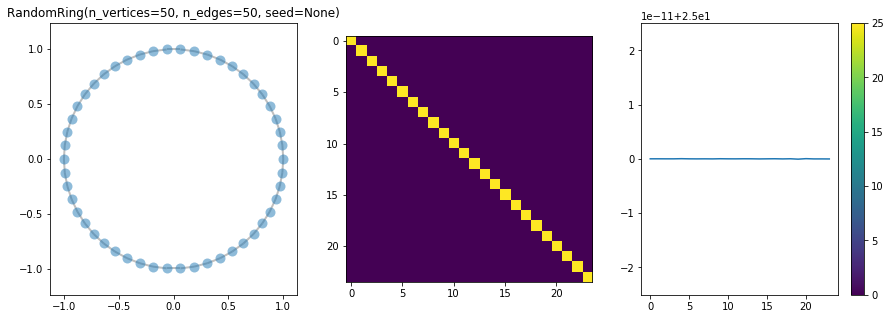

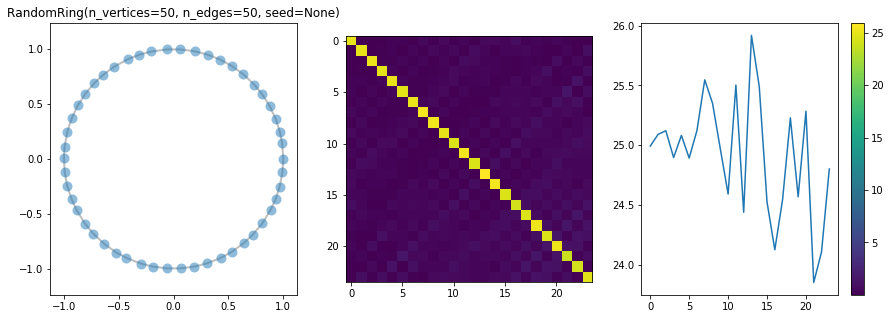

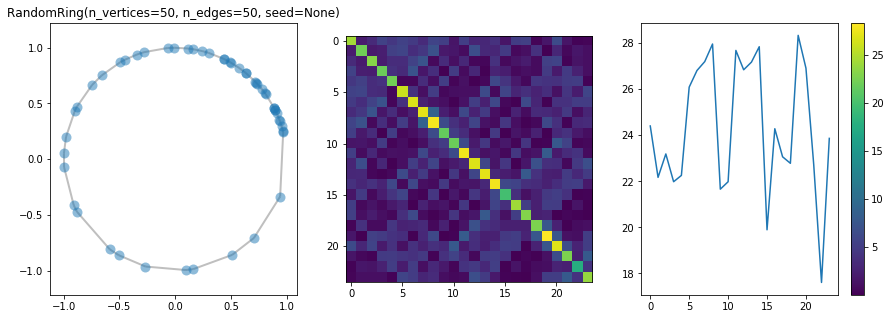

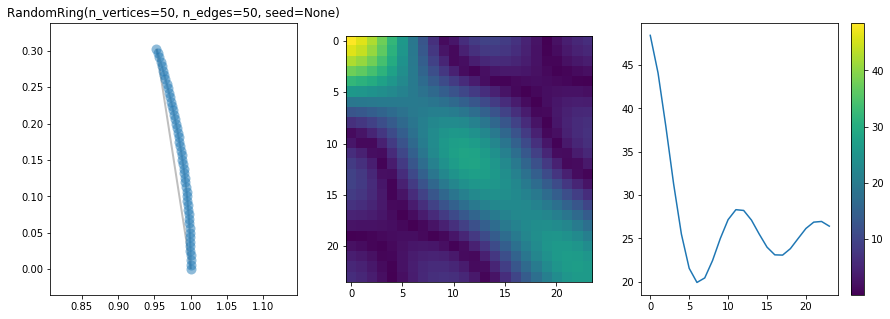

In [3]:
n_vertices = 50

# Uniform sampling.
angles = np.linspace(0, 2*np.pi, n_vertices, endpoint=False)
plot(angles, 'uniform.png')

# Non-uniform sampling.
noise = 0.01
angles = np.linspace(0, 2*np.pi, n_vertices, endpoint=False)
angles += np.random.normal(0, noise, n_vertices)
angles = np.clip(angles, 0, 2*np.pi-1e-10)
plot(angles, 'non-uniform_1.png')

# Non-uniform sampling.
noise = 0.1
angles = np.logspace(-.5, np.log10(2*np.pi), n_vertices, endpoint=False)
angles += np.random.normal(0, noise, n_vertices)
angles = np.clip(angles, 0, 2*np.pi-1e-10)
plot(angles, 'non-uniform_2.png')

# Non-uniform sampling: part of domain.
percentage = 0.1
angles = np.linspace(0, percentage*np.pi, n_vertices, endpoint=False)
plot(angles, 'part.png')